# E-Mail Spam Classifier

Importing all required libraries

In [17]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import numpy
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

creating our dataframe

In [18]:
data=pd.read_csv("spam.csv", encoding="ISO-8859-1")

df=pd.DataFrame(data)
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


creating our target column

In [19]:
df["spam"]=df["v1"].apply(lambda x: 1 if x=="spam" else 0)
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,spam
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,0
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,0
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN,1
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN,0
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN,0
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN,0


Spliting data into test and train

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(df["v2"],df["spam"],test_size=0.3)

KeyError: 'text'

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (3619,)
X_test shape: (1552,)


converting text to digits

In [ ]:
cv=TfidfVectorizer()
X_train_cv=cv.fit_transform(X_train)

In [ ]:
X_test_cv=cv.transform(X_test)

choosing our model

In [ ]:
model= MultinomialNB()
model.fit(X_train_cv,y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [ ]:
model_prediction = model.predict(X_test_cv)

Our Model Report

In [ ]:
print(classification_report(y_test,model_prediction))
print("Model accuracy % = ",end="")
print(model.score(X_test_cv,y_test)*100)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1067
           1       0.98      0.96      0.97       485

    accuracy                           0.98      1552
   macro avg       0.98      0.98      0.98      1552
weighted avg       0.98      0.98      0.98      1552

Model accuracy % = 98.06701030927834


*testing our own texts*

In [ ]:
text= ["let us have free tea","let's go eat icecream brother"]
text_cv=cv.transform(text)
pred=model.predict(text_cv)
for i in range(len(pred)):
    if pred[i]==1:
        print("spam")
    else:
        print("not spam")

not spam
spam


In [ ]:
conf=confusion_matrix(y_test,model_prediction)
conf

array([[1056,   11],
       [  19,  466]])

Creating visuals for comparision

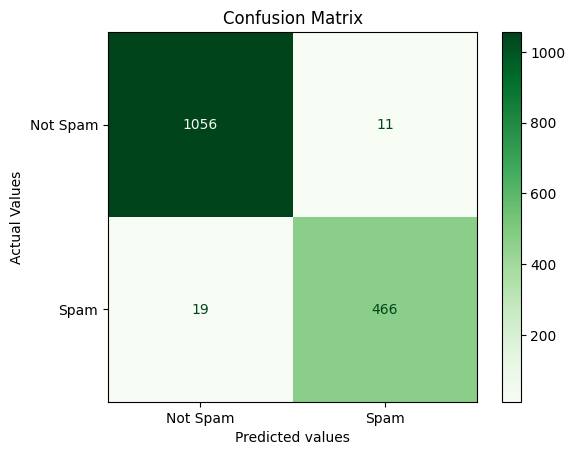

In [ ]:
matrix= ConfusionMatrixDisplay(confusion_matrix=conf , display_labels=["Not Spam","Spam"])
matrix.plot(cmap="Greens")
plt.title("Confusion Matrix")
plt.xlabel("Predicted values")
plt.ylabel("Actual Values")
plt.show()